In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
train_data = pd.read_csv('/Users/suhelkhan/CodSoft/Fraud/fraudTrain.csv')
test_data = pd.read_csv('/Users/suhelkhan/CodSoft/Fraud/fraudTest.csv')

# **Analysing the Dataset**

In [3]:
train_data.shape

(1296675, 23)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### There is no null values in any of the columns , which is a good news ,because now we don't need to impute data in preprocessing step 

In [5]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
train_data["merchant"].nunique(dropna ="True")

693

In [7]:
train_data['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [8]:
train_data['cc_num'].value_counts()

cc_num
571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: count, Length: 983, dtype: int64

## Visualising the Frauds in each months

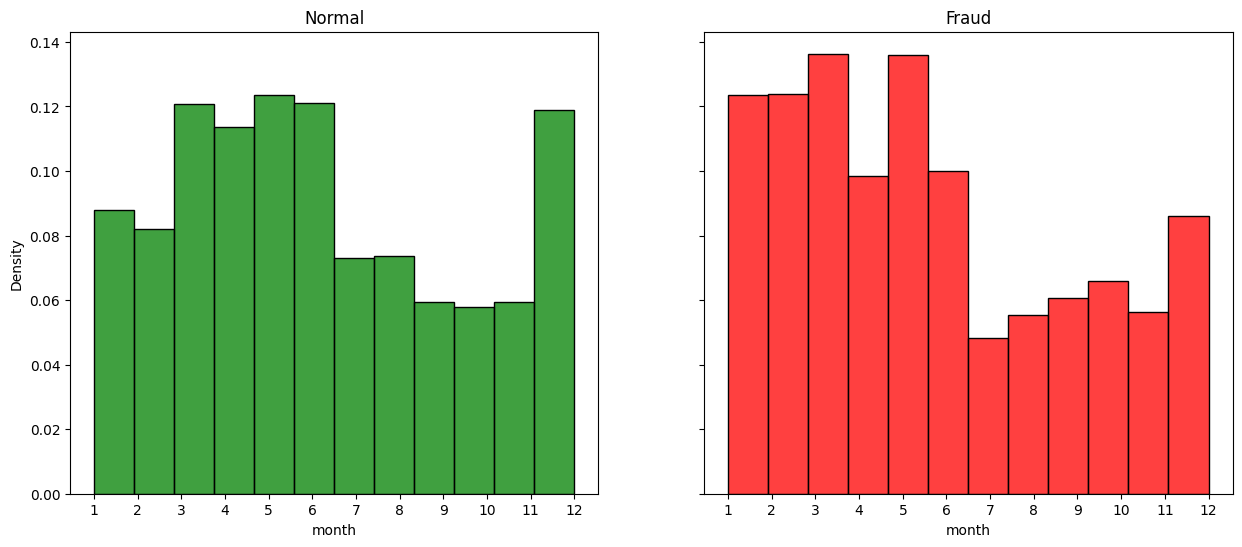

In [9]:
train_data['month'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.month
f, (nor, fraud) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
nor = sns.histplot(x='month', data=train_data[train_data["is_fraud"] == 0],
                   stat="density", bins=12, ax=nor , color="green")
fraud = sns.histplot(x='month', data=train_data[train_data["is_fraud"] == 1],
                   stat="density", bins=12, ax=fraud , color="red")
nor.set_title("Normal")
fraud.set_title("Fraud")
nor.set_xticks(np.arange(1, 13))
fraud.set_xticks(np.arange(1, 13));

**Here:<br>**
**1) The graph on the left shows the Normal Transactions in each month.<br>
2) The graph on the right shows the fraud transactions in each month.<br>
3) We can see that for some months the density of fraud transactions is more than normal transactions.**

## Visualising Frauds in Each Category and analyzing it .


In [10]:
train_data['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [11]:
train_data["fraud"] = train_data["is_fraud"]==1
train_data["not_fraud"] = train_data["is_fraud"]==0
train_data['fraud'] = train_data['fraud'].map({True: 1, False: 0})
train_data['not_fraud'] = train_data['not_fraud'].map({True: 1, False: 0})
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,month,fraud,not_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,0,1


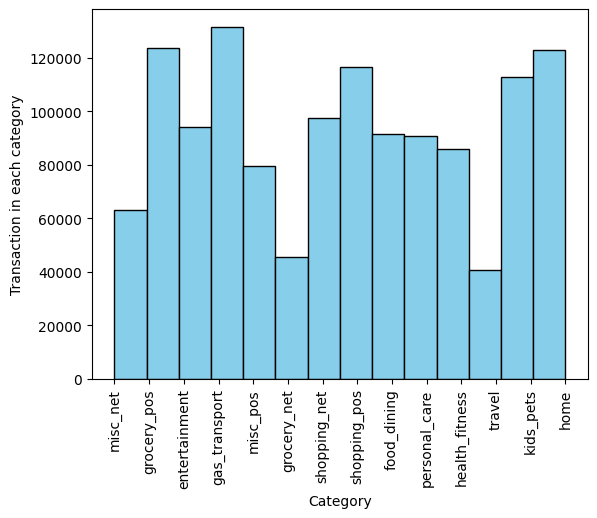

In [12]:
plt.hist(train_data['category'] , bins=14 , color='skyblue', edgecolor='black') ,
plt.xlabel("Category"),
plt.ylabel("Transaction in each category"),
plt.xticks(rotation=90),
plt.show()

**Showing number of transactions in each category**

<Axes: xlabel='category'>

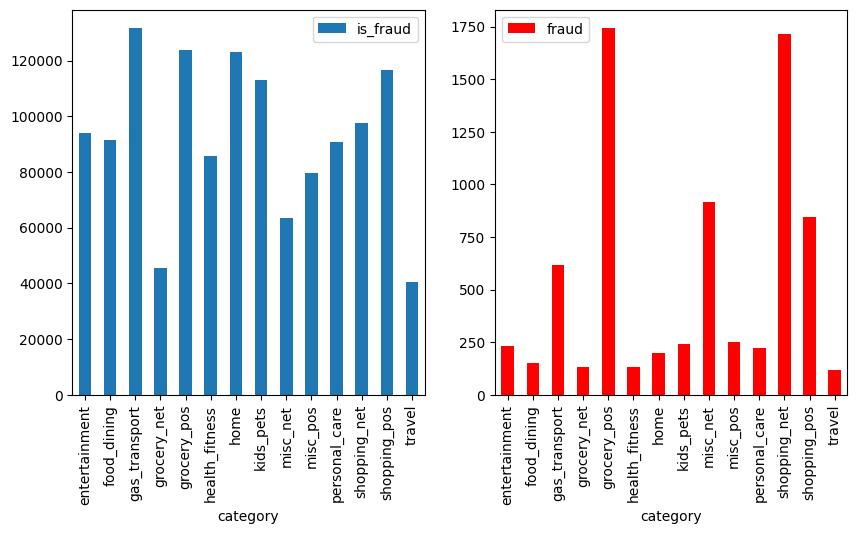

In [13]:
fig, axes = plt.subplots(1, 2 , figsize=(10,5))
train_data.groupby(["category"])[["is_fraud"]].count().plot.bar(ax=axes[0])
train_data.groupby(["category"])[["fraud"]].sum().plot.bar(ax=axes[1] , color="red")

##### **Showing FRAUD and NORMAL transactions in each category**

## Analysing Trends of amounts with fraud cases

In [14]:
amounts = train_data.groupby(["amt"])["fraud"].sum().nlargest(20)
print(amounts)

amt
8.75     6
18.55    6
7.04     5
8.78     5
9.18     5
9.21     5
9.36     5
9.94     5
9.95     5
10.23    5
10.64    5
18.96    5
19.36    5
19.77    5
22.10    5
7.21     4
7.24     4
7.52     4
8.01     4
8.09     4
Name: fraud, dtype: int64


**There is no regular trend with the amount and fraud**

## Analysing Which gender is more involved in Fraud Transaction cases

In [15]:
train_data.groupby(["gender"])[["is_fraud"]].sum()

,is_fraud
gender,
F,3735
M,3771


**No bias in this case is found**

## Analyzing number of fraud transactions from each state

In [16]:
train_data.groupby(["state"])["is_fraud"].sum().nlargest(10)

state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
Name: is_fraud, dtype: int64

**We can see that most of the fraud transactions comes from New York(NY) , Texas(TX) and PA .**

# Preprocessing

In [17]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'month', 'fraud', 'not_fraud'],
      dtype='object')

In [18]:
train_data["trans_num"].nunique()

1296675

In [19]:
train_data["unix_time"].nunique()

1274823

In [20]:
train_data["merch_lat"].nunique()

1247805

In [21]:
train_data["merch_long"].nunique()

1275745

In [22]:
train_data["lat"].nunique()

968

In [23]:
train_data["street"].nunique()

983

In [24]:
train_data["zip"].nunique()

970

In [25]:
train_data.drop(columns=['trans_date_trans_time','unix_time','first', 'last','fraud', 'not_fraud','trans_num'] , inplace=True)


In [26]:
train_data.drop(columns=['Unnamed: 0','dob'] , inplace=True)
train_data.shape

(1296675, 17)

In [27]:
train_data.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,month
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,1


In [28]:
train_data["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

## Categorical Encoding

In [29]:
pip install category_encoders


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import category_encoders as ce

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder',ce.WOEEncoder(),[1,2,4,5,6,7,12,13])] , remainder='passthrough' )

In [32]:
def apply_woe(train, columns,target_col):
    woe = ce.WOEEncoder()

    for col in columns:
         X = train[col]
         y = train[target_col]
         train[col] = woe.fit_transform(X, y)
    return train


In [33]:
columns_to_encode = ["category", "state", "city", "job","merchant","street"]
target_col = "is_fraud"
train_data = apply_woe(train_data, columns_to_encode,target_col)

In [34]:
X_train = train_data.drop(columns = "is_fraud")
y_train = train_data["is_fraud"]

In [36]:
y_train.shape

(1296675,)

## There is unequal distribution of the fraud and not fraud data items , hence we should try to under sample it to maintain a better proportion

In [37]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.01 , random_state=1)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [39]:
X_train.shape

(758106, 16)

In [40]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([750600,   7506]))

In [41]:
X_train["gender"] = le.fit_transform(X_train["gender"])

In [42]:
X_train.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,month
9584,4760122961662,-1.626150,-1.315531,26.92,1,1.424116,-0.223383,0.180468,44804,41.1116,-83.5020,1202,0.447027,42.016713,-83.446308,1
739988,4500002361389,-0.979335,-1.006921,18.43,1,0.182442,0.182442,0.041107,21865,38.2833,-75.8465,470,0.177296,38.366205,-76.023214,11


# Making Test and Dev Sets From fraudTest

In [43]:
test_data.shape

(555719, 23)

In [44]:
test_data["month"] = pd.to_datetime(test_data['trans_date_trans_time']).dt.month

In [45]:
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,month
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,6
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,6
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,6


In [46]:
test_data.drop(columns=['trans_date_trans_time','Unnamed: 0','dob','unix_time','first', 'last',"trans_num"] , inplace=True)


In [47]:
columns_to_encode = ["category", "state", "city", "job","merchant","street"]
target_col = "is_fraud"
test_data = apply_woe(test_data, columns_to_encode,target_col)

In [48]:
test_data["gender"] = le.fit_transform(test_data["gender"])

In [49]:
X_test_dev = test_data.drop(columns=["is_fraud"])
y_test_dev = test_data["is_fraud"]

In [50]:
X_test_dev.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,month
0,2291163933867244,0.340113,-0.762903,2.86,1,-0.910702,-0.910702,-0.096887,29209,33.9659,-80.9355,333497,-2.243730,33.986391,-81.200714,6
1,3573030041201292,-0.420209,-0.762903,29.84,0,-1.178691,-1.178691,-2.894229,84002,40.3207,-110.4360,302,-2.286016,39.450498,-109.960431,6


In [51]:
np.unique(y_test_dev , return_counts = True)

(array([0, 1]), array([553574,   2145]))

In [52]:
print(y_test_dev)

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64


## Splitting the dataset

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test_dev, y_test_dev, test_size=0.2 )

## Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test.loc[: ,["cc_num","amt","zip","lat","long","merch_lat","merch_long","city_pop","month"]]=sc.fit_transform(X_test.loc[:,["cc_num","amt","zip","lat","long","merch_lat","merch_long","city_pop","month"]])
X_valid.loc[:,["cc_num","amt","zip","lat","long","merch_lat","merch_long","city_pop","month"]]=sc.fit_transform(X_valid.loc[:,["cc_num","amt","zip","lat","long","merch_lat","merch_long","city_pop","month"]])
X_train.loc[:,["cc_num","amt","zip","lat","long","merch_lat","merch_long","city_pop","month"]]=sc.fit_transform(X_train.loc[:,["cc_num","amt","zip","lat","long","merch_lat","merch_long","city_pop","month"]])



In [56]:
X_train.head(3)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,month
9584,-0.318916,-1.626150,-1.315531,-0.273056,1,1.424116,-0.223383,0.180468,-0.149693,0.506554,0.489492,-0.290317,0.447027,0.680083,0.493116,-1.504568
739988,-0.318916,-0.979335,-1.006921,-0.324091,1,0.182442,0.182442,0.041107,-1.002435,-0.049796,1.044831,-0.292759,0.177296,-0.033321,1.031114,1.421057
621698,-0.315260,-0.416543,-0.869588,-0.306779,0,1.661473,1.661473,0.140597,-1.370833,0.447128,1.264167,-0.283368,-0.321149,0.484762,1.306474,0.835932


# Using Different Algorithms

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf = LogisticRegression(random_state=0 , penalty="l2" , max_iter=1000)

In [59]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [60]:
ytrain1= clf.predict(X_train)

In [61]:
y_pred1 = clf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)


0.9962795928695946

In [63]:
yval1 = clf.predict(X_valid)

In [64]:
accuracy_score(y_valid , yval1)

0.9965180306629238

In [65]:
accuracy_score(y_train , ytrain1)

0.9907638245838972

## Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
ytrain2= dclf.predict(X_train)

In [68]:
y_pred2 = dclf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.9930720350896924

In [69]:
yval2 = dclf.predict(X_valid)
accuracy_score(y_valid , yval2)

0.9925232131289139

In [70]:
accuracy_score(y_train , ytrain2)

1.0

## Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import GaussianNB
clfn = GaussianNB()
clfn.fit(X_train, y_train)

GaussianNB()

In [72]:
ytrain3= clfn.predict(X_train)

In [73]:
y_pred3 = clfn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.9077366023730529

In [74]:
y_val3 = clfn.predict(X_valid)
accuracy_score(y_valid,y_val3)

0.9084251061685741

In [75]:
accuracy_score(y_train , ytrain3)

0.9837700796458543

## Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clfr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [77]:
ytrain4= clfr.predict(X_train)

In [78]:
y_pred4 = clfr.predict(X_test)
accuracy_score(y_test,y_pred4)

0.9982207726480347

In [79]:
y_val4 = clfr.predict(X_valid)
accuracy_score(y_valid,y_val4)

0.998551428777082

In [80]:
accuracy_score(y_train , ytrain4)

0.9995435994438773

## XGBoost Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
clfg = GradientBoostingClassifier(n_estimators=20, learning_rate=0.001,
       max_depth=3, random_state=1).fit(X_train, y_train)

In [82]:
ytrain5= clfg.predict(X_train)

In [83]:
y_pred5 = clfg.predict(X_test)
accuracy_score(y_test,y_pred5)

0.9960928977112973

In [84]:
y_val5 = clfg.predict(X_valid)
accuracy_score(y_valid,y_val5)

0.9963290865903692

In [85]:
accuracy_score(y_train , ytrain5)

0.9900990099009901